Aeon Toran
February 07, 2026
2.5 Data Cleaning and Visualization using R

In [1]:
library(writexl)
library(readxl) #Load the readxl Library for Excel Files
library(dplyr) #Load the dplyr for data manipulation and transformation
library(IRdisplay) #Load the IRDisplay library to help interact with Jupyter notebooks

# Variables
todays_date <- format(Sys.Date(), "%Y-%m-%d")
student_id <- "AEOTOR0246"

# Read the Excel file into a data frame
file_path <- "C:/Users/Student/OneDrive - ECPI University/SDC380/AirBnBSummary_v2 (1).xlsx"
df <- read_excel(file_path)

# Find duplicate rows before cleaning
duplicate_rows_before <- df[duplicated(df),]

# Display Header Text
display_markdown(paste("###", student_id, "-", todays_date))

#Display duplicate rows before cleaning
display_markdown("### Duplicate Rows before cleaning")
display(duplicate_rows_before)

# Make a copy of the data frame and remove duplicates
df_cleaned <- df
df_cleaned <- df_cleaned %>% distinct()

# Find duplicate rows after cleaning
duplicate_rows_after <- df_cleaned[duplicated(df_cleaned),]

# Display duplicate rows after cleaning
display_markdown("### Duplicate Rows after cleaning")
display(duplicate_rows_after)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




ERROR: Error in utils::unzip(zip_path, list = TRUE): zip file 'C:\Users\Student\OneDrive - ECPI University\SDC380\AirBnBSummary_v2 (1).xlsx' cannot be opened


In [ ]:
# --- Count unique neighbourhoods BEFORE cleaning ---
count_before <- table(df$neighbourhood)

# --- Misspellings identified in the Excel file ---
misspellings_correction <- c(
  "Dowtown" = "Downtown",
  "Near Noth/University" = "Near North/University",
  "West Olentangey" = "West Olentangy"
)

# --- Convert to character ---
df_cleaned$neighbourhood <- as.character(df_cleaned$neighbourhood)

# --- Store original values ---
before_vals <- df_cleaned$neighbourhood

# --- Fix capitalization inconsistencies FIRST ---
df_cleaned$neighbourhood <- tools::toTitleCase(
  tolower(df_cleaned$neighbourhood)
)

# --- Fix misspellings ---
df_cleaned$neighbourhood <- ifelse(
  df_cleaned$neighbourhood %in% names(misspellings_correction),
  misspellings_correction[df_cleaned$neighbourhood],
  df_cleaned$neighbourhood
)

# --- Store cleaned values ---
after_vals <- df_cleaned$neighbourhood

# --- Count unique neighbourhoods AFTER cleaning ---
count_after <- table(df_cleaned$neighbourhood)

# --- Count how many rows were corrected ---
replaced_count <- sum(before_vals != after_vals, na.rm = TRUE)

# --- Display header ---
display_markdown(paste0("### ", student_id, " - ", todays_date))

# --- Display result ---
display_markdown(paste0("**", replaced_count, " entries were replaced.**"))



In [ ]:
#Find the number of missing values in each column before filling
missing_values_before <- sapply(df, function(x) sum(is.na(x)))

# Display Header Text
display_markdown(paste("###", student_id, "-", todays_date))

# Display the number of missing values in each column
display_markdown("### Number of missing values in each column")
display (missing_values_before)

# Fill missing values with the median value of each column
# Median is less sensitive to outliers
df_cleaned <- df_cleaned %>% mutate(across(everything(), ~
ifelse(is.na(.), median (., na.rm=TRUE), .)))

# Find the number of missing values in each column after filling
missing_values_after <- sapply(df_cleaned, function(x) sum(is.na(x)))

# Display the number of missing values in each column after filling
display_markdown("### Number of missing values in each column after filling with median")
display(missing_values_after)

In [ ]:
outliers <- list() # Initialize a list to store data frames containing outliers for each column
numerical_columns <- names(df_cleaned)[sapply(df_cleaned, is.numeric)] # Identifynumerical columns

# Find outliers using 3.5* IQR method for each numerical column
for (col in numerical_columns) {
    Q1 <- quantile(df_cleaned[[col]], 0.25, na.rm = TRUE)
    Q3 <- quantile(df_cleaned[[col]], 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    outliers [[col]] <- df_cleaned[(df_cleaned[[col]] < Q1 - 3.5 * IQR) | (df_cleaned[[col]] > Q3 + 3.5 * IQR),]
}

# Display Header Text
display_markdown(paste("###", student_id, "-", todays_date))

# Display Outliers
display_markdown("### Outliers")
for (col in names(outliers)) {
    if (nrow(outliers[[col]]) > 0) {
        display_markdown(paste("**", col, ":**"))
        display(outliers[[col]][col])
    }
}

# Handle outliers by replacing them with the median value of each column
display_markdown("**After cleaning:**")
for (col in names(outliers)) {
    if (nrow(outliers[[col]]) > 0) {
        median_value <- median(df_cleaned[[col]], na.rm = TRUE)
        outlier_indices <- as.integer(rownames(outliers[[col]]))
        df_cleaned[outlier_indices, col] <- median_value
        display_markdown(paste("**", col, ":**"))
        display(df_cleaned[outlier_indices, col])
    }
}

In [ ]:
# Save the cleaned DataFrame to an Excel file
cleaned_file_path <- "C:/Users/Student/OneDrive - ECPI University/SDC380/AirBnBSummary_v2 (1).xlsx"
write_xlsx(df_cleaned, cleaned_file_path)

In [6]:
library(readxl)
library(IRdisplay)

# Variables
todays_date <- format(Sys.Date(), "%Y-%m-%d")
student_id <- "AEOTOR0246"

# Read the Excel file into a data frame
file_path <- "C:/Users/Student/Downloads/AirBnBSummary_v2 (1).xlsx"
df_new <- read_excel(file_path, sheet = "ListingData")

# Display Header Text
display_markdown(paste("###", student_id, "-", todays_date))

# ----------------------------
# PRICE Statistics
# ----------------------------
mean_price <- mean(df_new$price, na.rm = TRUE)
std_price <- sd(df_new$price, na.rm = TRUE)
median_price <- median(df_new$price, na.rm = TRUE)
min_price <- min(df_new$price, na.rm = TRUE)
max_price <- max(df_new$price, na.rm = TRUE)

# ----------------------------
# MINIMUM NIGHTS Statistics
# ----------------------------
mean_min_nights <- mean(df_new$minimum_nights, na.rm = TRUE)
std_min_nights <- sd(df_new$minimum_nights, na.rm = TRUE)
median_min_nights <- median(df_new$minimum_nights, na.rm = TRUE)
min_min_nights <- min(df_new$minimum_nights, na.rm = TRUE)
max_min_nights <- max(df_new$minimum_nights, na.rm = TRUE)

# ----------------------------
# AVAILABILITY (365) Statistics
# ----------------------------
mean_avail <- mean(df_new$availability_365, na.rm = TRUE)
std_avail <- sd(df_new$availability_365, na.rm = TRUE)
median_avail <- median(df_new$availability_365, na.rm = TRUE)
min_avail <- min(df_new$availability_365, na.rm = TRUE)
max_avail <- max(df_new$availability_365, na.rm = TRUE)

# ----------------------------
# CORRELATIONS (like your old happiness vs life expectancy)
# ----------------------------
cor_price_reviews <- cor(df_new$price, df_new$number_of_reviews, use = "pairwise.complete.obs")
cor_price_min_nights <- cor(df_new$price, df_new$minimum_nights, use = "pairwise.complete.obs")
cor_price_availability <- cor(df_new$price, df_new$availability_365, use = "pairwise.complete.obs")

# ----------------------------
# 25th Percentile (like your old Freedom 25th percentile)
# ----------------------------
price_25th_percentile <- quantile(df_new$price, 0.25, na.rm = TRUE)

# ----------------------------
# Display Calculated Statistics
# ----------------------------
print(paste("Mean Price:", mean_price))
print(paste("Standard Deviation of Price:", std_price))
print(paste("Median Price:", median_price))
print(paste("Minimum Price:", min_price))
print(paste("Maximum Price:", max_price))

print(paste("Mean Minimum Nights:", mean_min_nights))
print(paste("Standard Deviation of Minimum Nights:", std_min_nights))
print(paste("Median Minimum Nights:", median_min_nights))
print(paste("Minimum Minimum Nights:", min_min_nights))
print(paste("Maximum Minimum Nights:", max_min_nights))

print(paste("Mean Availability (365):", mean_avail))
print(paste("Standard Deviation of Availability (365):", std_avail))
print(paste("Median Availability (365):", median_avail))
print(paste("Minimum Availability (365):", min_avail))
print(paste("Maximum Availability (365):", max_avail))

print(paste("Correlation between Price and Number of Reviews:", cor_price_reviews))
print(paste("Correlation between Price and Minimum Nights:", cor_price_min_nights))
print(paste("Correlation between Price and Availability_365:", cor_price_availability))

print(paste("25th Percentile of Price:", as.numeric(price_25th_percentile)))



### AEOTOR0246 - 2026-02-07

[1] "Mean Price: 148.602253521127"
[1] "Standard Deviation of Price: 119.094813135483"
[1] "Median Price: 115"
[1] "Minimum Price: 20"
[1] "Maximum Price: 1171"
[1] "Mean Minimum Nights: 5.9398538504778"
[1] "Standard Deviation of Minimum Nights: 13.080751285643"
[1] "Median Minimum Nights: 2"
[1] "Minimum Minimum Nights: 1"
[1] "Maximum Minimum Nights: 300"
[1] "Mean Availability (365): 203.28579481398"
[1] "Standard Deviation of Availability (365): 125.093364121913"
[1] "Median Availability (365): 178"
[1] "Minimum Availability (365): 0"
[1] "Maximum Availability (365): 365"
[1] "Correlation between Price and Number of Reviews: -0.11113203189961"
[1] "Correlation between Price and Minimum Nights: -0.0119785720331905"
[1] "Correlation between Price and Availability_365: 0.0672721179488755"
[1] "25th Percentile of Price: 84"


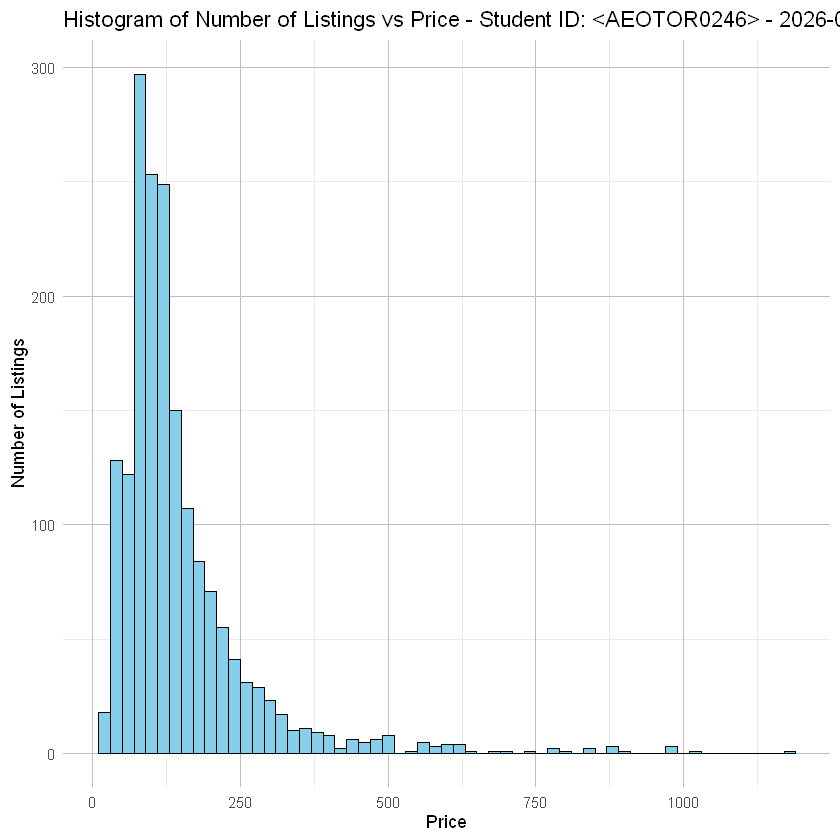

In [11]:
# Load required libraries if not already loaded
library(readxl)    # Read Excel files
library(ggplot2)   # Visualization package for R
library(dplyr)     # Data manipulation and transformation in R
library(corrplot)  # Visualization of correlation matrices

# Variables
student_id <- "<AEOTOR0246>"

# Read the Excel file into a data frame
file_path <- "C:/Users/Student/Downloads/AirBnBSummary_v2 (1)T.xlsx"   
df_new <- read_excel(file_path, sheet = "Sheet1")

# Get current date and time
current_datetime <- format(Sys.time(), "%Y-%m-%d %H:%M:%S")

# Histogram of Number of Listings vs Price
ggplot(df_new, aes(x = price)) +
  geom_histogram(
    binwidth = 20,
    fill = "skyblue",
    color = "black"
  ) +
  xlab("Price") +
  ylab("Number of Listings") +
  ggtitle(
    paste(
      "Histogram of Number of Listings vs Price - Student ID:",
      student_id,
      "-",
      current_datetime
    )
  ) +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "grey"))


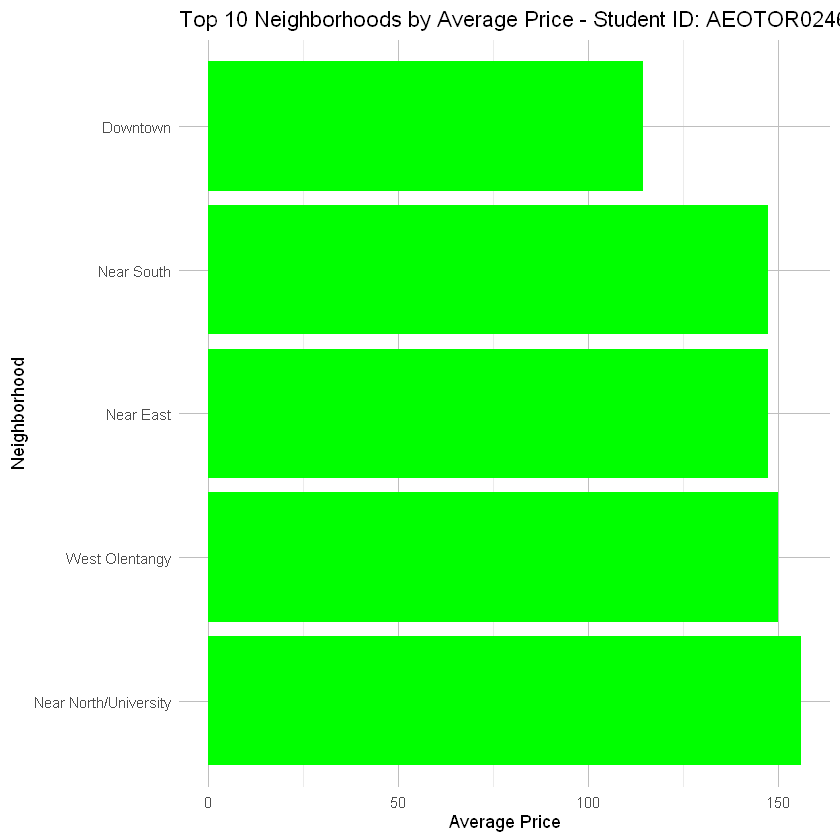

In [13]:
# Variables
student_id <- "AEOTOR0246"

# Read the Excel file into a data frame
file_path <- "C:/Users/Student/Downloads/AirBnBSummary_v2 (1)T.xlsx"
df_new <- read_excel(file_path, sheet = "Sheet1")

# Get current date and time
current_datetime <- format(Sys.time(), "%Y-%m-%d %H:%M:%S")

# Select Top 10 Neighborhoods by Average Price
top_10_neighborhoods <- df_new %>%
  group_by(neighbourhood) %>%
  summarise(avg_price = mean(price, na.rm = TRUE)) %>%
  arrange(desc(avg_price)) %>%
  head(10)

# Bar Chart for Top 10 Neighborhoods by Average Price
ggplot(top_10_neighborhoods, aes(x = reorder(neighbourhood, -avg_price), y = avg_price)) +
  geom_bar(stat = "identity", fill = "green") +
  xlab("Neighborhood") +
  ylab("Average Price") +
  ggtitle(paste("Top 10 Neighborhoods by Average Price - Student ID:", student_id, "-", current_datetime)) +
  coord_flip() +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "grey"))


`geom_smooth()` using formula = 'y ~ x'


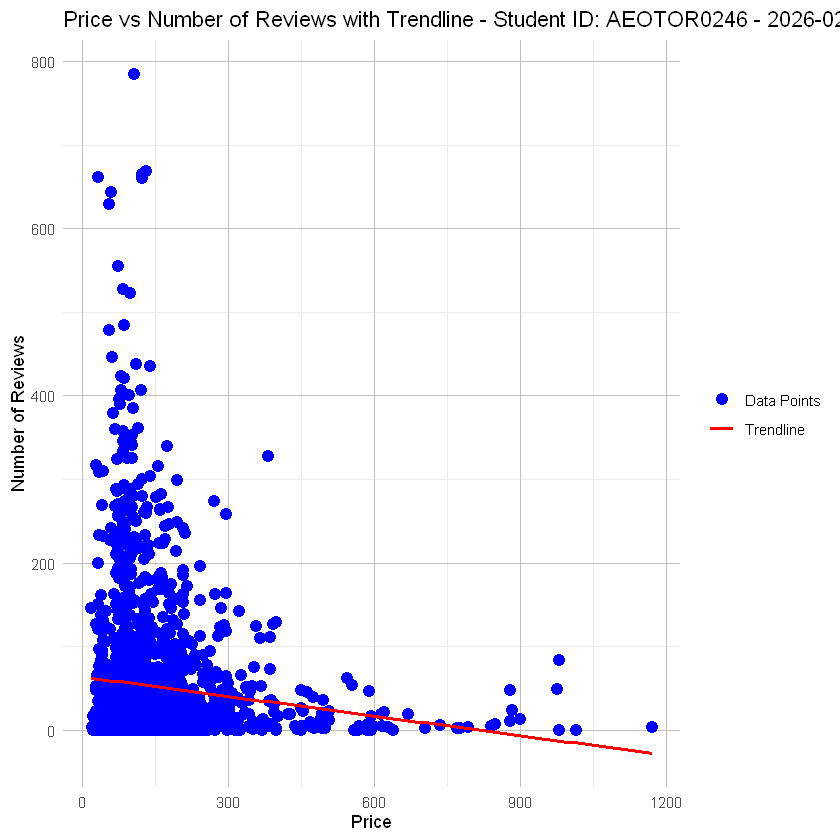

In [14]:
# Variables
student_id <- "AEOTOR0246"

# Read the Excel file into a data frame
file_path <- "C:/Users/Student/Downloads/AirBnBSummary_v2 (1)T.xlsx"
df_new <- read_excel(file_path, sheet = "Sheet1")

# Get current date and time
current_datetime <- format(Sys.time(), "%Y-%m-%d %H:%M:%S")

# Create the scatter plot with trendline
ggplot(df_new, aes(x = price, y = number_of_reviews)) +
  geom_point(aes(color = "Data Points"), size = 3) +
  geom_smooth(method = "lm", se = FALSE, aes(color = "Trendline")) +
  scale_color_manual(
    values = c(
      "Data Points" = "blue",
      "Trendline" = "red"
    )
  ) +
  xlab("Price") +
  ylab("Number of Reviews") +
  ggtitle(
    paste(
      "Price vs Number of Reviews with Trendline - Student ID:",
      student_id,
      "-",
      current_datetime
    )
  ) +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "grey")) +
  theme(legend.title = element_blank())


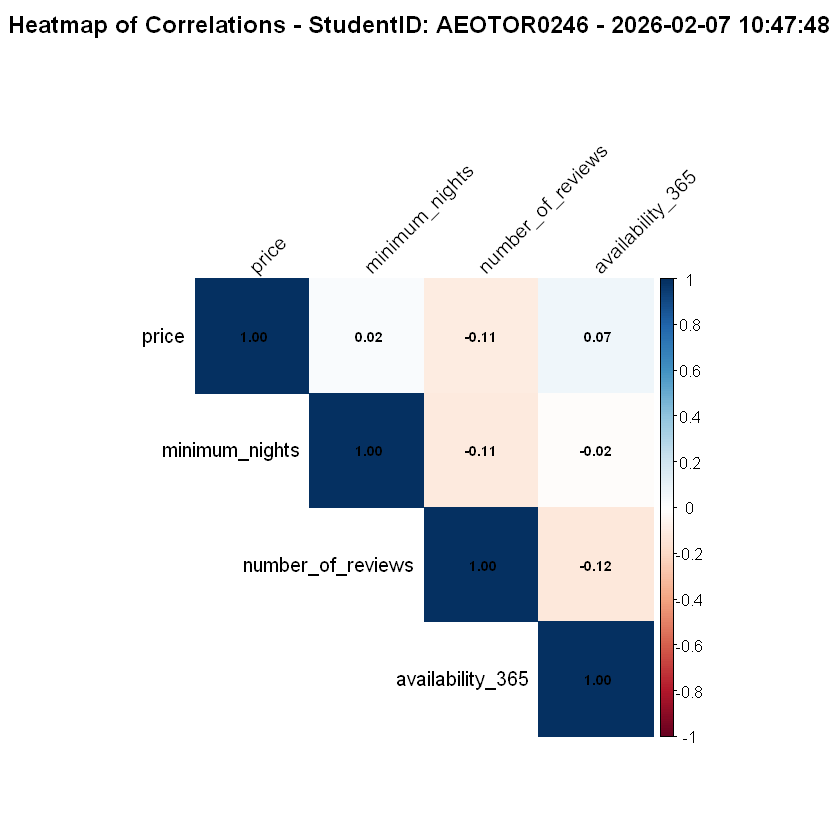

In [18]:
# Variables
student_id <- "AEOTOR0246"

# Read the Excel file into a data frame
file_path <- "C:/Users/Student/Downloads/AirBnBSummary_v2 (1)T.xlsx"
df_new <- read_excel(file_path, sheet = "Sheet1")

# Get current date and time
current_datetime <- format(Sys.time(), "%Y-%m-%d %H:%M:%S")

# Select Columns for Correlation Matrix
selected_columns <- df_new %>%
  select(price, minimum_nights, number_of_reviews, availability_365)

# Calculate Correlation Matrix
correlation_matrix <- cor(
  selected_columns,
  use = "pairwise.complete.obs"
)

# Create Heatmap
corrplot(
  correlation_matrix,
  method = "color",
  type = "upper",
  title = paste("Heatmap of Correlations - StudentID:", student_id, "-", current_datetime),
    mar = c(0, 0, 2, 0),
  tl.col = "black",
  tl.srt = 45,
  number.cex = 0.7,
  addCoef.col = "black"
)
 
